## Descriptive Analysis for Movies DataSet

In [5]:
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [11]:
#Importing movies csv

movies = pd.read_csv('movies_metadata.csv', low_memory = False)

In [10]:
#Changing original title to title (keeping all titles in English)

movies[movies['original_title'] != movies['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [12]:
# Dropping useless variables for this analysis

movies = movies.drop(['adult','homepage', 'spoken_languages', 'original_title','imdb_id', 'poster_path', 'status', 'tagline', 'video'], axis = 1)

In [13]:
#Info on movies
movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0


In [14]:
#Type of variables in movies
movies.dtypes

belongs_to_collection     object
budget                    object
genres                    object
id                        object
original_language         object
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
title                     object
vote_average             float64
vote_count               float64
dtype: object

In [15]:
#Movies structure
movies.shape

(45466, 15)

In [16]:
#Changing 0 revenue (not available) with nan
movies['revenue'] = movies['revenue'].replace(0, np.nan)

In [17]:
#Same for budget (also changing some value to numeric)
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['budget'] = movies['budget'].replace(0, np.nan)
movies[movies['budget'].isnull()].shape

(36576, 15)

In [18]:
#Calculating return

movies['return'] = movies['revenue'] / movies['budget']
movies[movies['return'].isnull()].shape

(40085, 16)

In [21]:
#Defining movies' year by release date

movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [22]:
#Defining month and day order

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [23]:
#Def month
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [24]:
#Def day
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [25]:
#Get month and day from release date
movies['day'] = movies['release_date'].apply(get_day)
movies['month'] = movies['release_date'].apply(get_month)

<AxesSubplot:title={'center':'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

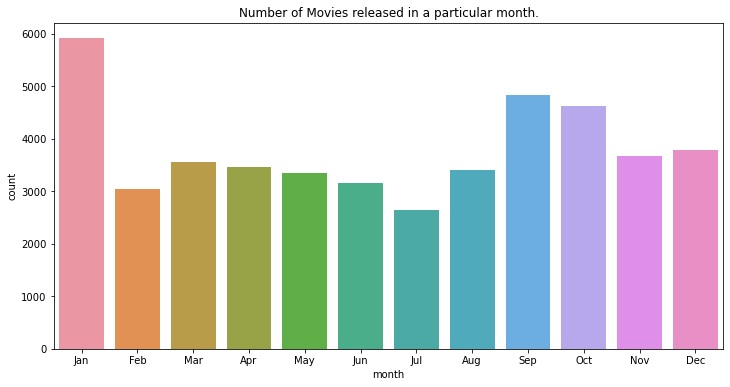

In [26]:
#Plot of movies per month

plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=movies, order=month_order)

<AxesSubplot:title={'center':'Average Gross by the Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

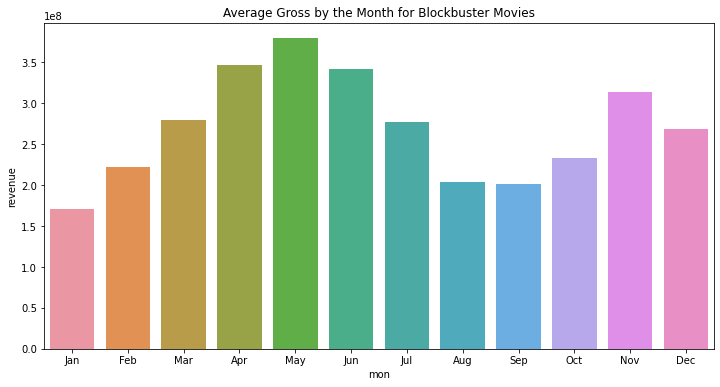

In [27]:
#Monthly revenue for blockbuster

month_mean = pd.DataFrame(movies[movies['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

(0.0, 12.0)

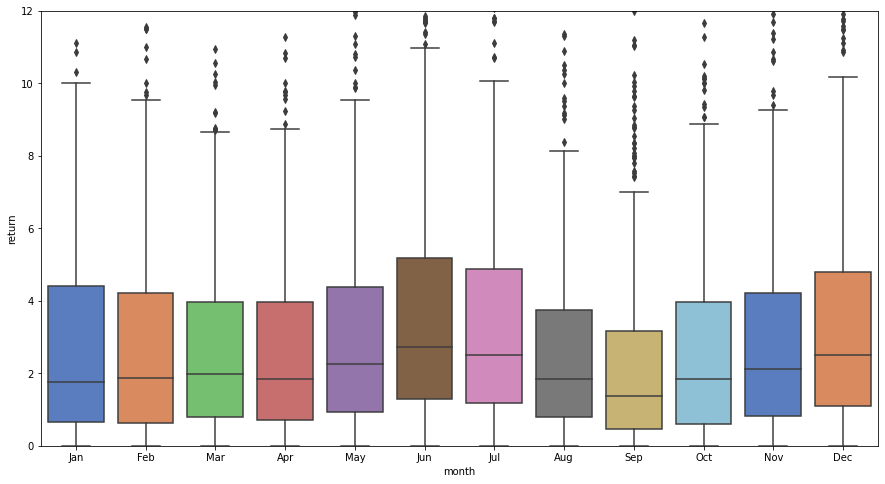

In [28]:
#Most succesful months

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=movies[movies['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

<AxesSubplot:title={'center':'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

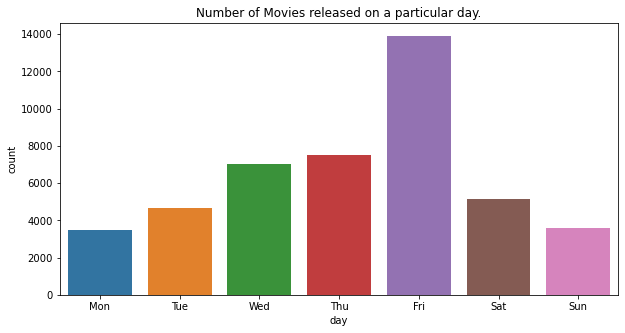

In [30]:
#Most frequent day of release

plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=movies, order=day_order)

<AxesSubplot:xlabel='year'>

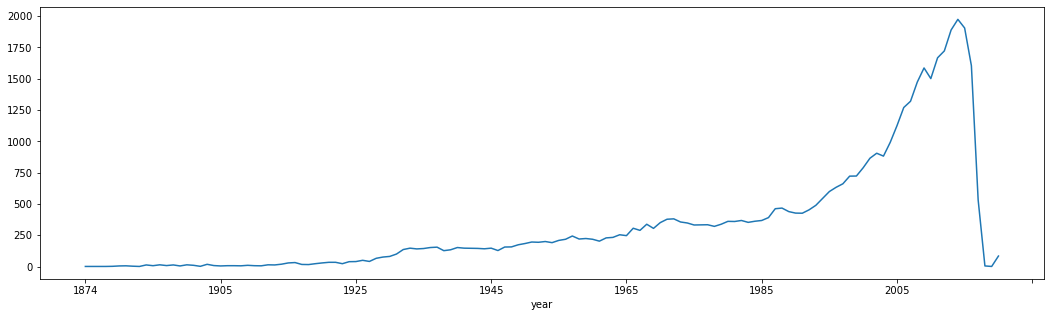

In [32]:
#Movies by year

year_count = movies.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [35]:
#Heatmap of last century movies

months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
movies_21 = movies.copy()
movies_21['year'] = movies_21[movies_21['year'] != 'NaT']['year'].astype(int)
movies_21 = movies_21[movies_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=movies_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

<AxesSubplot:xlabel='year', ylabel='month'>

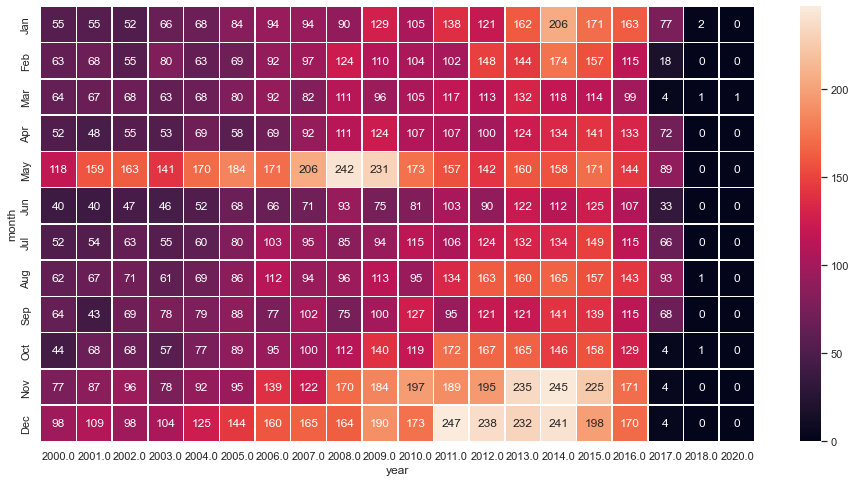

In [37]:
#Plotting

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [38]:
#Creating str for all movies titles and overviews

movies['title'] = movies['title'].astype('str')
movies['overview'] = movies['overview'].astype('str')

In [39]:
#Creating a join list of titles and overviews

title_corpus = ' '.join(movies['title'])
overview_corpus = ' '.join(movies['overview'])

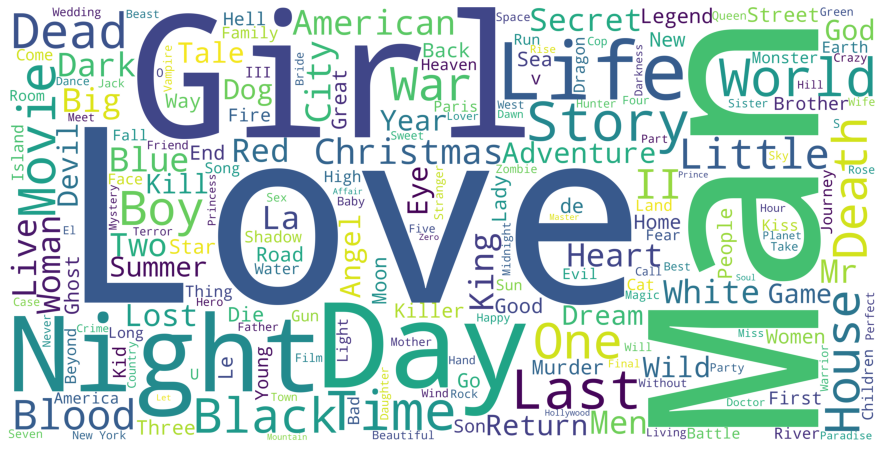

In [40]:
#Creating a wordcloud for titles w/stopwords

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

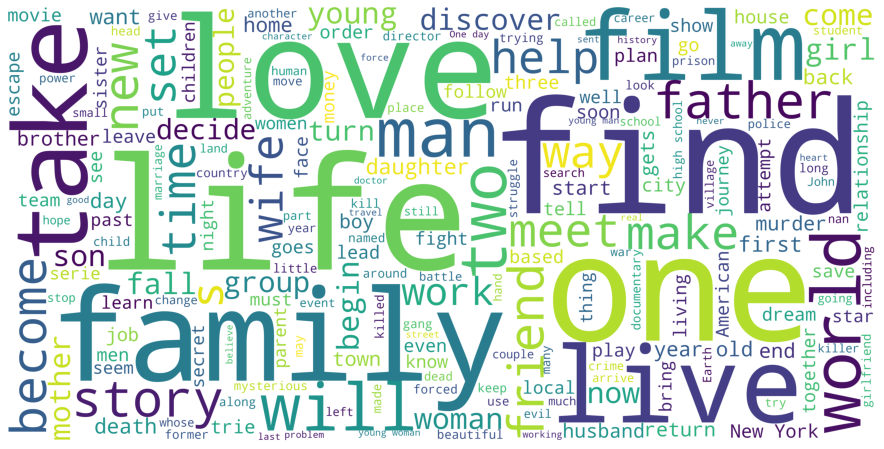

In [41]:
#Same for overviews

overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [54]:
#Creating a list of movies divided by franchise

movies_fran = movies[movies['belongs_to_collection'].notnull()]
movies_fran['belongs_to_collection'] = movies_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
movies_fran = movies_fran[movies_fran['belongs_to_collection'].notnull()]

In [53]:
#disabling upper warning if happened:

pd.options.mode.chained_assignment = None

In [56]:
#Revenue per franchise

fran_pivot = movies_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

fran_pivot.sort_values('sum', ascending=False).head(10)

fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [57]:
#Removing original_language duplicate

movies['original_language'].drop_duplicates().shape[0]


93

In [59]:
#Dividing movies by language

lang_movies = pd.DataFrame(movies['original_language'].value_counts())
lang_movies['language'] = lang_movies.index
lang_movies.columns = ['number', 'language']
lang_movies.head()


,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


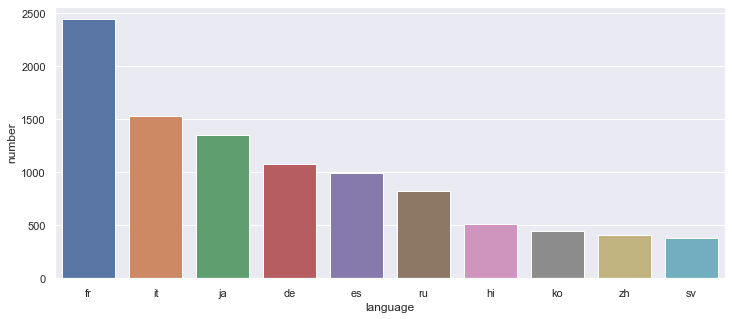

In [61]:
#Creating a plot for languages

plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_movies.iloc[1:11])
plt.show()

In [62]:
#Loop for prod companies

movies['production_companies'] = movies['production_companies'].fillna('[]').apply(ast.literal_eval)
movies['production_companies'] = movies['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [74]:
#Creating a list for companies

s = movies.apply(lambda x: pd.Series(x['production_companies'], dtype='object'),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [75]:
#Creating a df for companies

com_movies = movies.drop('production_companies', axis=1).join(s)

In [76]:
#Function for companies

com_sum = pd.DataFrame(com_movies.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_movies.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_movies.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']
com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)


In [77]:
#Highest production companies

com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


In [78]:
#Most succesful companies

com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)


,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


In [83]:
#Popularity, vote avg and count

def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan
    
movies['popularity'] = movies['popularity'].apply(clean_numeric).astype('float')
movies['vote_count'] = movies['vote_count'].apply(clean_numeric).astype('float')
movies['vote_average'] = movies['vote_average'].apply(clean_numeric).astype('float')

In [84]:
#Description of popularity

movies['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

/Users/nicolasmcontreras/miniconda3/envs/JupyterEnv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


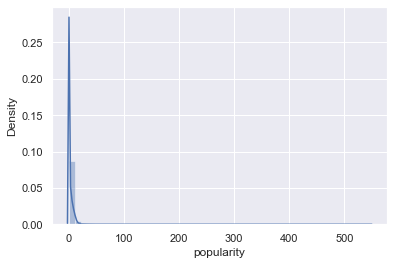

In [85]:
#Distribution plot of popularity

sns.distplot(movies['popularity'].fillna(movies['popularity'].median()))
plt.show()

In [86]:
#Description of vote count

movies['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [87]:
#Most voted movies

movies[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)


,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [88]:
#Description of vote avg

movies['vote_average'] = movies['vote_average'].replace(0, np.nan)
movies['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

/Users/nicolasmcontreras/miniconda3/envs/JupyterEnv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

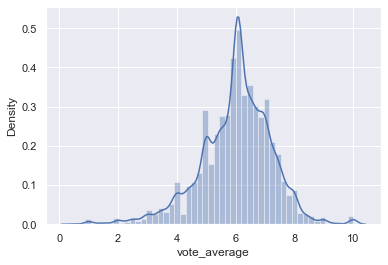

In [89]:
#Distribution plot of vote avg

sns.distplot(movies['vote_average'].fillna(movies['vote_average'].median()))

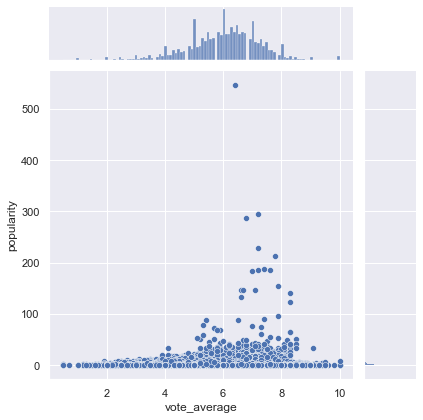

In [90]:
#Correlation between popularity and vote avg

sns.jointplot(x='vote_average', y='popularity', data=movies)

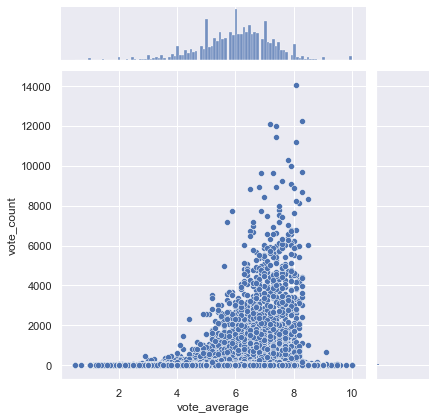

In [91]:
#Correlation between vote avg and vote count

sns.jointplot(x='vote_average', y='vote_count', data=movies)

In [92]:
#Description of budget variable

movies['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

/Users/nicolasmcontreras/miniconda3/envs/JupyterEnv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget', ylabel='Density'>

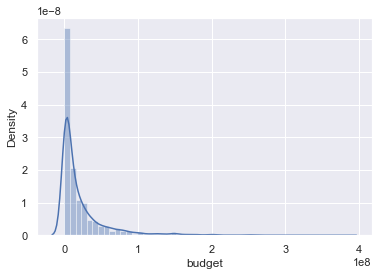

In [93]:
#Distribution plot of budget

sns.distplot(movies[movies['budget'].notnull()]['budget'])

In [94]:
#Most expensive movies of all time

movies[movies['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


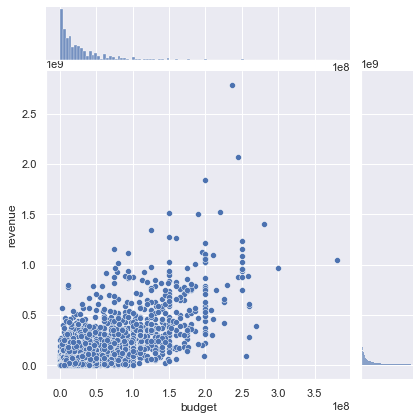

In [96]:
#Correlation between budget and revenue

sns.jointplot(x='budget',y='revenue',data=movies[movies['return'].notnull()])


In [98]:
#Description of revenue variable

movies['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

/Users/nicolasmcontreras/miniconda3/envs/JupyterEnv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

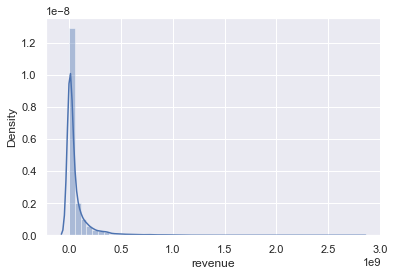

In [99]:
#Distribution plot of revenue

sns.distplot(movies[movies['revenue'].notnull()]['revenue'])

In [100]:
#Most successful movies

movies[(movies['return'].notnull()) & (movies['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


In [102]:
#Worst successful movies

movies[(movies['return'].notnull()) & (movies['budget'] > 5e6) & (movies['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


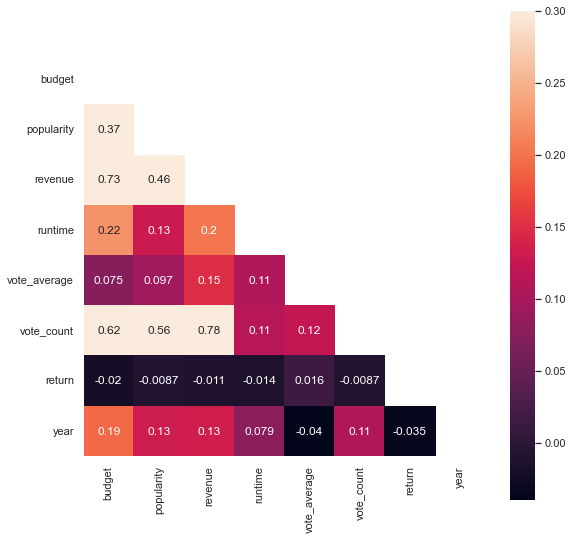

In [103]:
#Correlation matrix

movies['year'] = movies['year'].replace('NaT', np.nan)

movies['year'] = movies['year'].apply(clean_numeric)

sns.set(font_scale=1)
corr = movies.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

